In [120]:
# import das bibliotecas usadas no projeto

import numpy as np
import seaborn as sns
from math import sqrt

In [113]:
def lanca_dados() -> int:
    '''
    Função para simular o lançamento de dois dados e retornar a soma das duas faces
    
    Parametros: Nenhum
    
    Retorno: inteiro com a soma dos resultados dos dados'''
    
    dados = np.random.randint(1, 7, size = (1, 2)) # vetor simulando o lançamento dos dois dados

    soma_faces = np.sum(dados)

    return soma_faces

#armazenando os resultados de 1000 lancamentos num vetor
arr_resultados = np.array([lanca_dados() for i in range(1000)])


In [114]:
# Calculando os resultados

media = round(np.mean(arr_resultados), 2)

maximo = np.max(arr_resultados)

minimo = np.min(arr_resultados)

dvp = np.std(arr_resultados)

print(f'''
A média dos resultados é: {media}
\nO lançamento máximo foi: {maximo}
\nO lançamento minimo foi {minimo}''')

print('\n\nA frequencia de cada resultado é:\n')

# contagem das frequencias de cada resultado

for resultado in range(2, 13):
    freq = np.count_nonzero(arr_resultados == resultado) # conta a ocorrencia de cada possível resultado
    
    print(f'Soma igual à {resultado:2d}: {freq} --> {round(freq/len(arr_resultados) * 100, 2)}% do total de jogos')


A média dos resultados é: 6.96

O lançamento máximo foi: 12

O lançamento minimo foi 2


A frequencia de cada resultado é:

Soma igual à  2: 34 --> 3.4% do total de jogos
Soma igual à  3: 52 --> 5.2% do total de jogos
Soma igual à  4: 74 --> 7.4% do total de jogos
Soma igual à  5: 123 --> 12.3% do total de jogos
Soma igual à  6: 160 --> 16.0% do total de jogos
Soma igual à  7: 143 --> 14.3% do total de jogos
Soma igual à  8: 136 --> 13.6% do total de jogos
Soma igual à  9: 111 --> 11.1% do total de jogos
Soma igual à 10: 79 --> 7.9% do total de jogos
Soma igual à 11: 64 --> 6.4% do total de jogos
Soma igual à 12: 24 --> 2.4% do total de jogos


In [115]:
# normalizando a distribuicao
desvio = (arr_resultados - media) / dvp

C:\Users\vinic\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


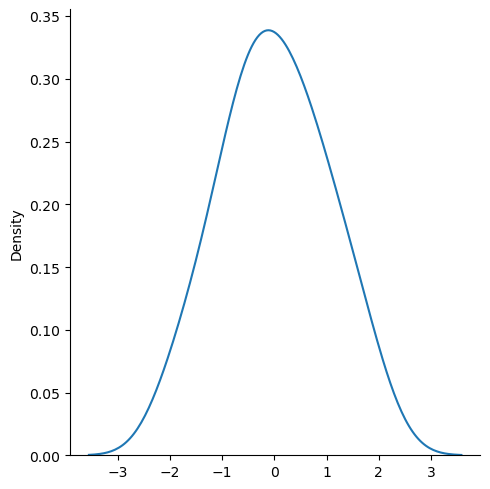

In [148]:
# plotando a distribuicao normalizada do conjunto de dados
distribuicao = sns.displot(desvio, kind="kde", bw_adjust=2)

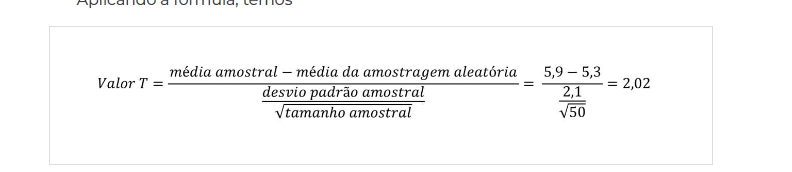

referencia: https://www.zup.com.br/blog/teste-t-de-student

In [149]:
# teste de hipotese

#Hipotese nula H0: Distribuicao é normal com média u = 6.96
# Hipotese alternativa: H1: Distribuicao normal com média u <> 6.96

# Adotando um intervalo de confianca de 95%, o tamanho da amostra pode ser de 278 e a qtd de desvios padrao é z = +-1,96

#np.random.seed(42) # semente para replicabilidade da minha amostra

arr_amostra = np.random.choice(arr_resultados, size=278) # vetor de amostras aleatorios para fazermos o teste de hipotese

tam_amostra = len(arr_amostra)

media_amostral = np.mean(arr_amostra)

dvp_amostral = np.std(arr_amostra)

t_valor = (media_amostral - media) / dvp_amostral # uso só dvp_amostral ou dvp / raiz de 278

#(dvp_amostral / sqrt(tam_amostra))

if -1.96 <= t_valor <= 1.96:
    print('Podemos dizer com 95% de certeza de que a simulacao coincide com a suposicao de lançamentos igualmente prováveis')

else:
    print('A simulacao nao reflete a realidade')

Podemos dizer com 95% de certeza de que a simulacao coincide com a suposicao de lançamentos igualmente prováveis
